<a href="https://colab.research.google.com/github/abdulmujeeb886/projects/blob/automobile_project/Logistic_MLE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# suppress display of warnings
import warnings
warnings.filterwarnings('ignore')

# Pandas is used for data manipulation and analytics
import numpy as np

# Numpy is used for mathematicalo operations on large, multi-dimensional arrays and matrices
import pandas as pd


import scipy.stats as stats

# matplotlib is a data visualization library for 2D and 3D plots,built on numoy
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Seaborn is based on mmatplotlib used for plotting statistical graphics
import seaborn as sns

# import is_string_dtype to check if the type of input is string
from pandas.api.types import is_string_dtype

# import various func to perform classification
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.linear_model import SGDClassifier


# import func to perform logistic regression
import statsmodels
import statsmodels.api as sm

In [ ]:
# set theplot size using rcparams
plt.rcParams['figure.figsize']=[15,8]

# 2. Set Options

In [ ]:
# display all columns of the dataframe
pd.options.display.max_columns=None

# display all rows of the dataframe
pd.options.display.max_rows=None

# use below code to convert the expotential values to float
np.set_printoptions(suppress=True)

# 3. Read Data

In [ ]:
from google.colab import files


uploaded = files.upload()

Saving h1n1_vaccine_prediction.csv to h1n1_vaccine_prediction (1).csv


In [ ]:
df=pd.read_csv('h1n1_vaccine_prediction.csv')

In [ ]:
df.head(2)

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,dr_recc_seasonal_vacc,chronic_medic_condition,cont_child_undr_6_mnths,is_health_worker,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,age_bracket,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0


In [ ]:
df.shape

(26707, 34)

# 4. Data Analysis and Preparation

In [ ]:
df.dtypes

,0
unique_id,int64
h1n1_worry,float64
h1n1_awareness,float64
antiviral_medication,float64
contact_avoidance,float64
bought_face_mask,float64
wash_hands_frequently,float64
avoid_large_gatherings,float64
reduced_outside_home_cont,float64
avoid_touch_face,float64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  26707 non-null  int64  
 1   h1n1_worry                 26615 non-null  float64
 2   h1n1_awareness             26591 non-null  float64
 3   antiviral_medication       26636 non-null  float64
 4   contact_avoidance          26499 non-null  float64
 5   bought_face_mask           26688 non-null  float64
 6   wash_hands_frequently      26665 non-null  float64
 7   avoid_large_gatherings     26620 non-null  float64
 8   reduced_outside_home_cont  26625 non-null  float64
 9   avoid_touch_face           26579 non-null  float64
 10  dr_recc_h1n1_vacc          24547 non-null  float64
 11  dr_recc_seasonal_vacc      24547 non-null  float64
 12  chronic_medic_condition    25736 non-null  float64
 13  cont_child_undr_6_mnths    25887 non-null  flo

**Change thr incorrect data type**

In [ ]:
# use loop to change the data type of variables
for col in ['h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc',
       'chronic_medic_condition', 'cont_child_undr_6_mnths',
       'is_health_worker', 'has_health_insur', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
       'is_seas_risky', 'sick_from_seas_vacc','no_of_adults', 'no_of_children']:

      #  use .astype() to change the data type
      df[col]=df[col].astype('object')

In [ ]:
df.dtypes

,0
unique_id,int64
h1n1_worry,object
h1n1_awareness,object
antiviral_medication,object
contact_avoidance,object
bought_face_mask,object
wash_hands_frequently,object
avoid_large_gatherings,object
reduced_outside_home_cont,object
avoid_touch_face,object


In [ ]:
#  drop the filed 'unique_id'
df.drop('unique_id',axis=1,inplace=True)

In [ ]:
df.shape

(26707, 33)

In [ ]:
# splitting features and the target variable
# consider all the columns except 'h1n1_vaccine' using iloc
df_features=df.iloc[:, df.columns != 'h1n1_vaccine']

# consider the target variable
df_target=df.iloc[:, df.columns == 'h1n1_vaccine']
# df_features.columns

In [ ]:
# df_target.columns

In [ ]:
# df['h1n1_vaccine'].dtypes
df_target.dtypes
# df_features.dtypes

,0
h1n1_vaccine,int64


In [ ]:
df_features.shape

(26707, 32)

In [ ]:
df_features.sample(2)

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,dr_recc_seasonal_vacc,chronic_medic_condition,cont_child_undr_6_mnths,is_health_worker,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,age_bracket,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children
14316,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,5.0,1.0,5.0,2.0,4.0,18 - 34 Years,< 12 Years,Hispanic,Female,NaN,Not Married,Own,Not in Labor Force,"MSA, Principle City",1.0,1.0
18640,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,2.0,2.0,4.0,2.0,2.0,55 - 64 Years,< 12 Years,White,Female,NaN,Married,Own,Not in Labor Force,"MSA, Principle City",2.0,1.0


In [ ]:
df_target.sample(5)

,h1n1_vaccine
1143,0
12488,0
18693,0
25847,0
14934,0


# Summary Statistics

In [ ]:
df_features.describe()

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,dr_recc_seasonal_vacc,chronic_medic_condition,cont_child_undr_6_mnths,is_health_worker,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,age_bracket,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children
count,26615.0,26591.0,26636.0,26499.0,26688.0,26665.0,26620.0,26625.0,26579.0,24547.0,24547.0,25736.0,25887.0,25903.0,14433.0,26316.0,26319.0,26312.0,26245.0,26193.0,26170.0,26707,25300,26707,26707,22284,25299,24665,25244,26707,26458.0,26458.0
unique,4.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,5.0,5.0,5.0,5.0,5.0,5.0,5,4,4,2,3,2,2,3,3,4.0,4.0
top,2.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,2.0,2.0,4.0,2.0,1.0,65+ Years,College Graduate,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0
freq,10575.0,14598.0,25335.0,19228.0,24847.0,22015.0,17073.0,17644.0,18001.0,19139.0,16453.0,18446.0,23749.0,23004.0,12697.0,11683.0,9919.0,9129.0,11629.0,8954.0,11870.0,6843,10097,21222,15858,12777,13555,18736,13560,11645,14474.0,18672.0


In [ ]:
df_target.describe()

,h1n1_vaccine
count,26707.000000
mean,0.212454
std,0.409052
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


# Distribution of variables

**Distibution of numeric independent variables**
**Distibution of categoric independent variables**
**Distibution of dependent variables**

** Distibution of categoric independent variables**

In [ ]:
#  create a list of all categorical variables
# initiate an empty list to store the categorical variables
categorical=[]

# use for loop to check the data type of each variable
for column in df_features:

  # use if statement with condition to check the categorical vtype
  if is_string_dtype(df_features[column]):

    # append the variables with categoric data type in the list categorical
    categorical.append(column)


In [ ]:
categorical

['age_bracket', 'race', 'sex', 'census_msa']

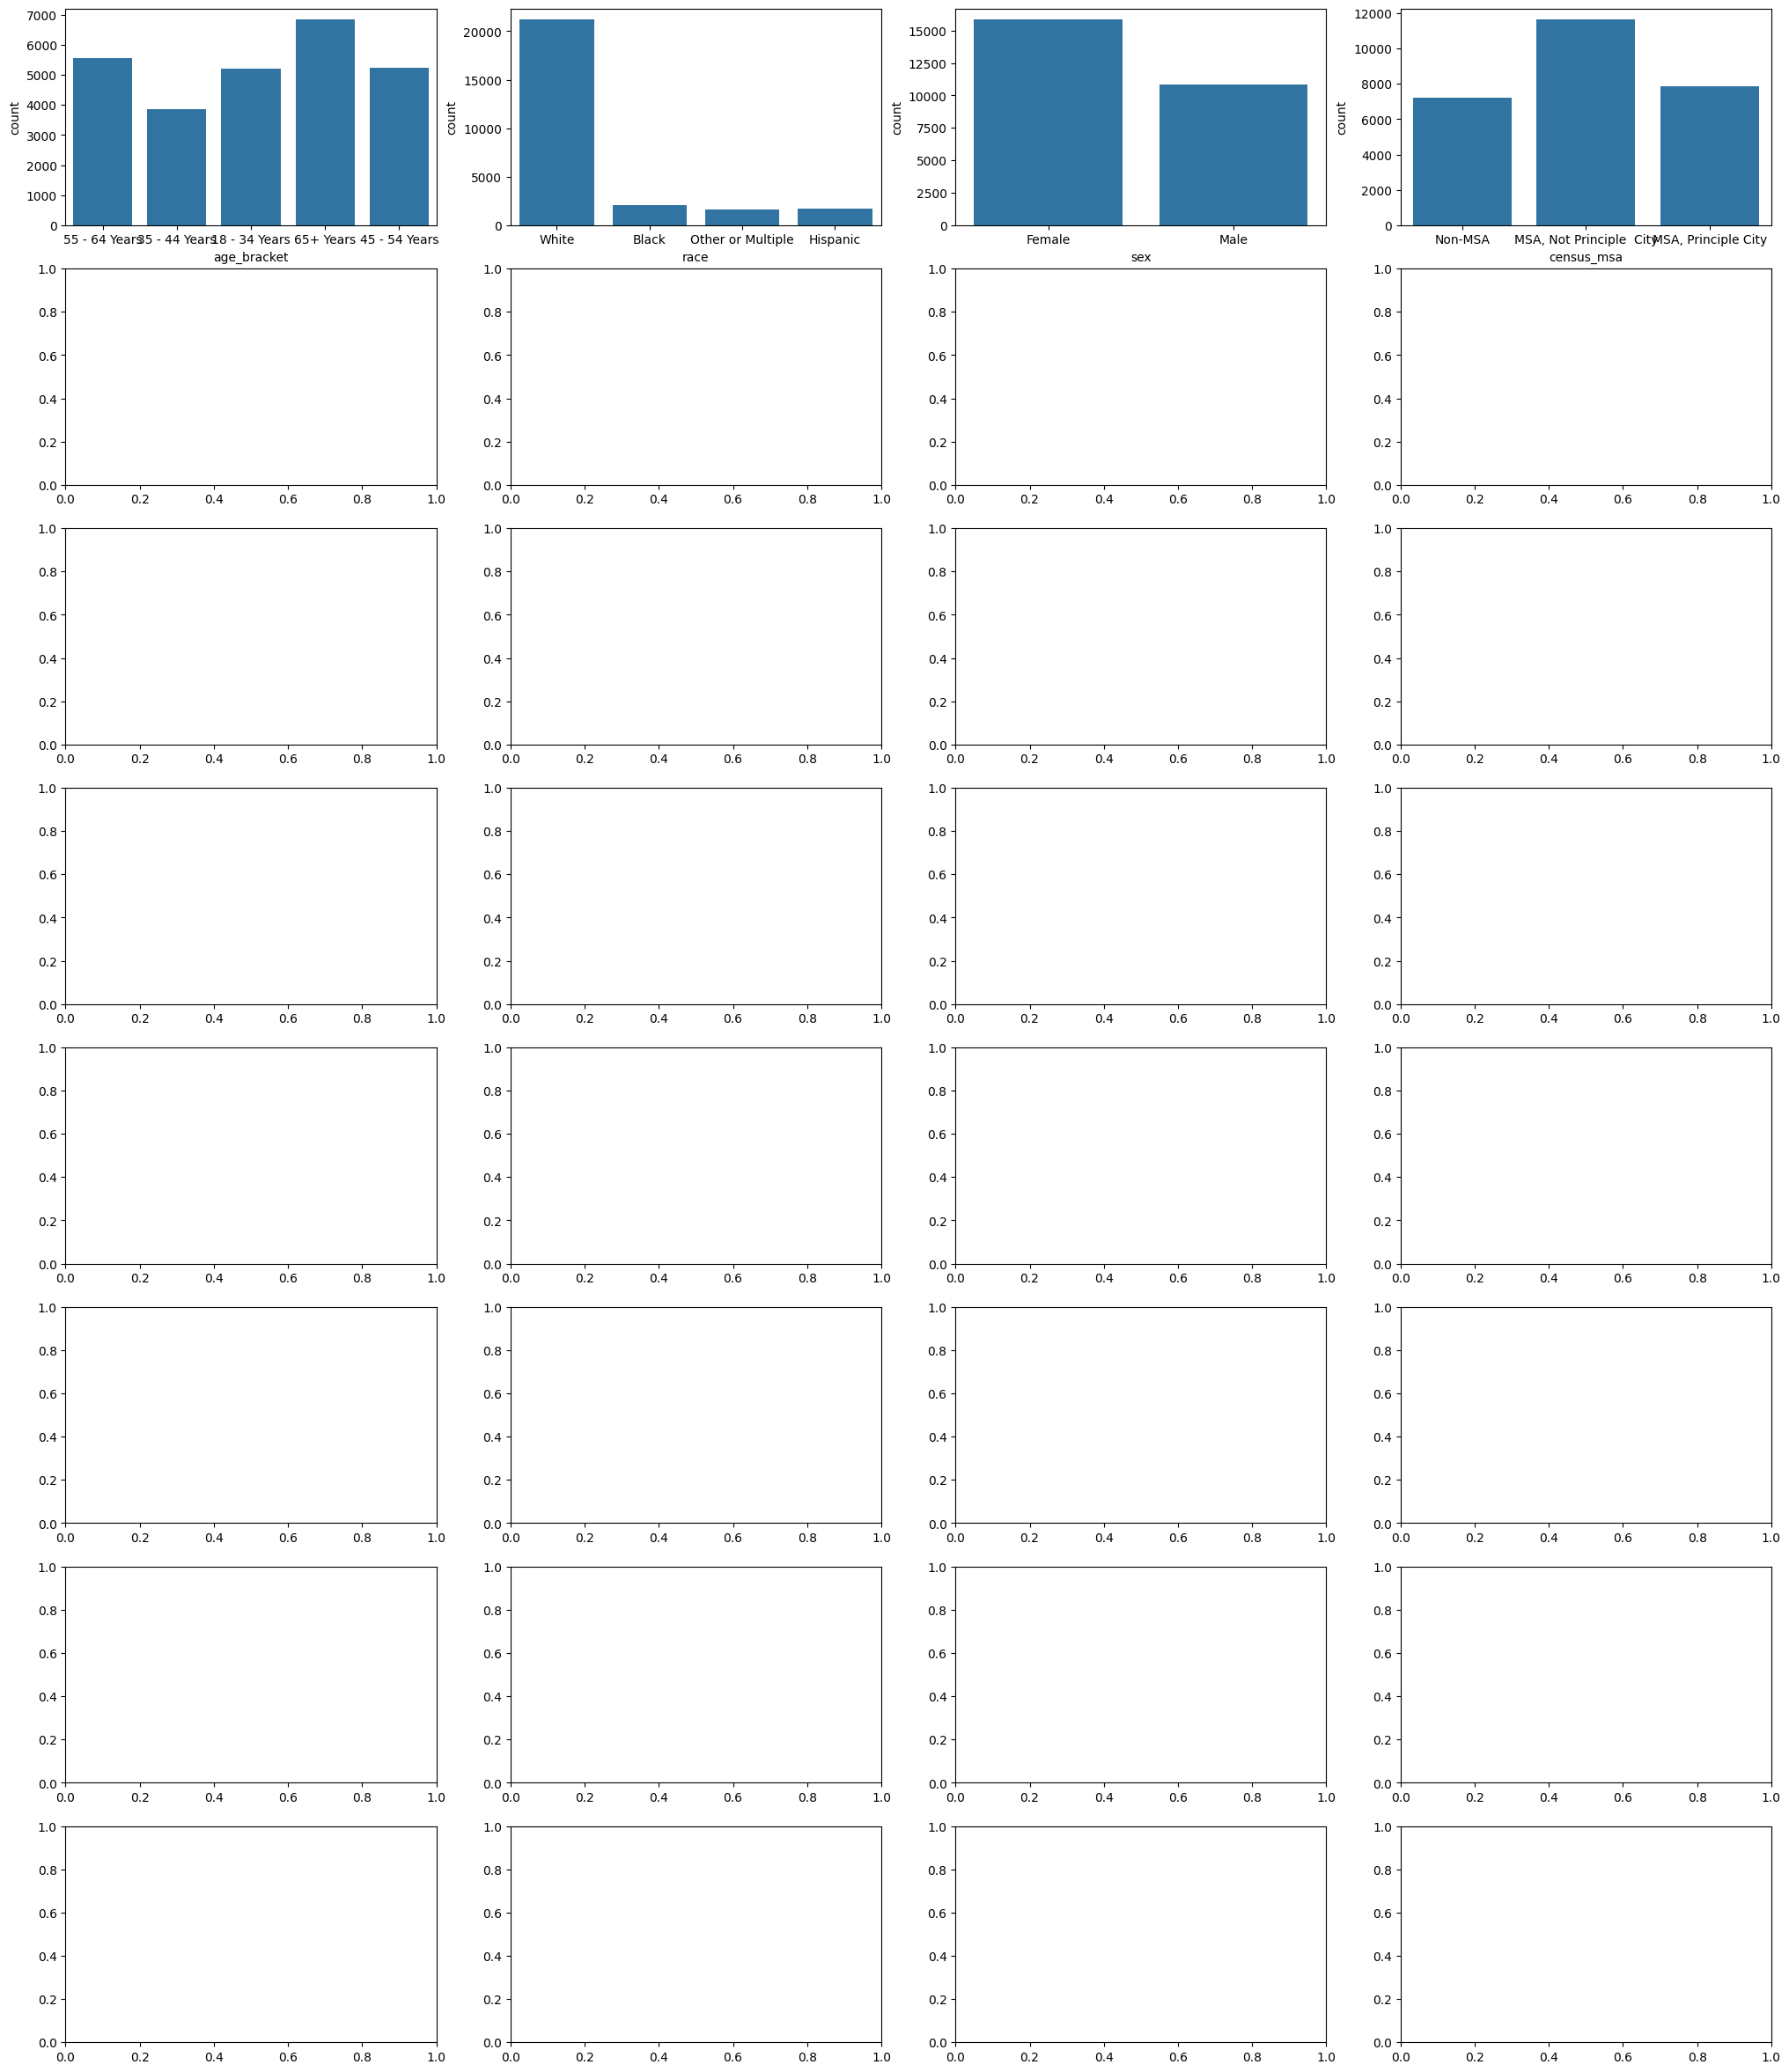

In [ ]:
# plot the count plot for eachcategorical variable
# set the number of rows in the subplot using the parameter 'nrows'
# set the number of columns in the subplot using the parameter 'ncols'
fig, ax=plt.subplots(nrows=8,ncols=4,figsize=(25,30))

# use for loop to plot the count for each variable
for variable,subplot in zip(categorical,ax.flatten()):

  # use contplot() to plot the graph
  # pass the axes for the plot to the parameter, 'ax'
  sns.countplot(x=variable,data=df,ax=subplot)

plt.show()

In [ ]:
categorical

['age_bracket', 'race', 'sex', 'census_msa']

In [ ]:
class_freq=df_target.h1n1_vaccine.value_counts()
class_freq

,count
h1n1_vaccine,
0,21033
1,5674


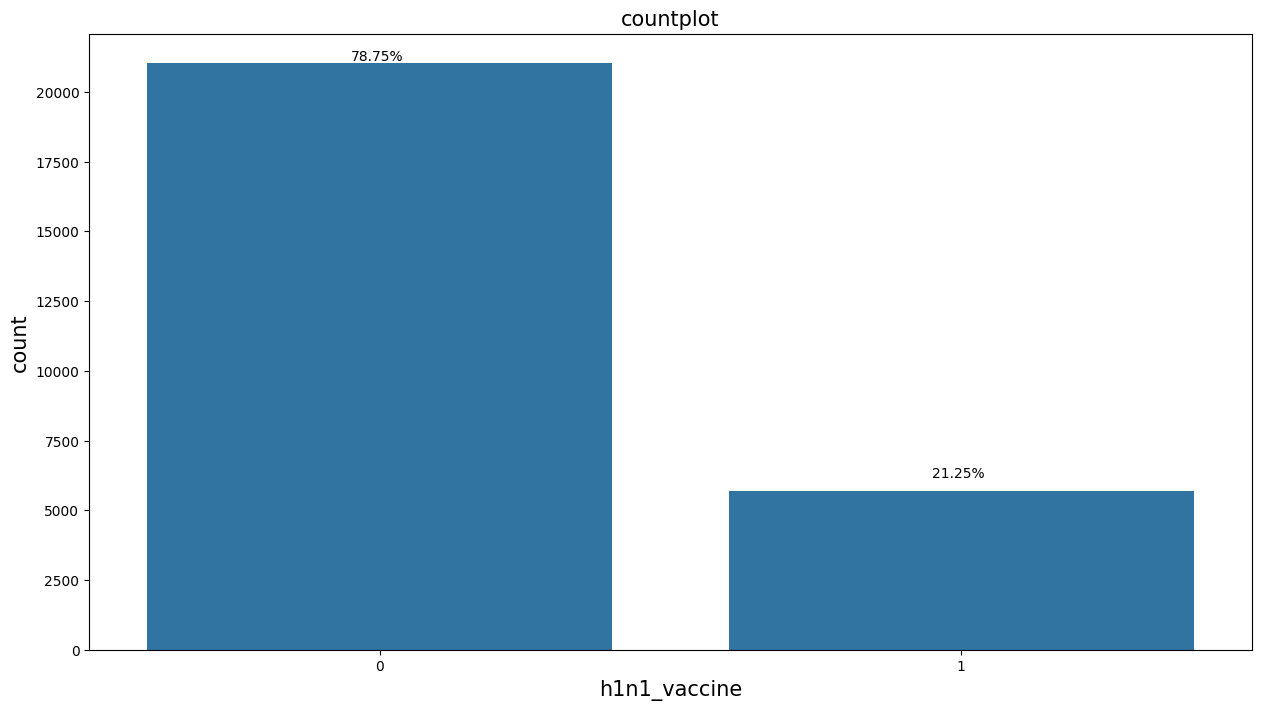

In [ ]:
# plot the countpplot of the var h1n1
sns.countplot(x=df_target.h1n1_vaccine)

# 'x' and 'y' gives position of the text
# 's' is the text on the plot
plt.text(x=-0.05, y=df_target.h1n1_vaccine.value_counts()[0] + 100,
         s=str(round((class_freq[0])*100/len(df_target.h1n1_vaccine),2)) + '%')
plt.text(x=0.95, y=df_target.h1n1_vaccine.value_counts()[1] + 500,
         s=str(round((class_freq[1])*100/len(df_target.h1n1_vaccine),2)) + '%')

# add plot and axes labels
# set text size using fontsize
plt.title('countplot',fontsize=15)
plt.xlabel('h1n1_vaccine',fontsize=15)
plt.ylabel('count',fontsize=15)

# show the plot

plt.show()

In [ ]:
df_target.h1n1_vaccine.value_counts()[0]


np.int64(21033)

In [ ]:
  s=str(round((class_freq[0])*100/len(df_target.h1n1_vaccine),2)) + '%'
  s

'78.75%'

# Correlation

# Missing values

In [ ]:
total = df.isnull().sum().sort_values(ascending=False)

percent=(df.isnull().sum()*100/df.isnull().count()).sort_values(ascending=False)

missing_data=pd.concat([total,percent],axis=1,keys=['Total','Percent of Missing values'])
missing_data

,Total,Percent of Missing values
has_health_insur,12274,45.957989
income_level,4423,16.561201
dr_recc_seasonal_vacc,2160,8.087767
dr_recc_h1n1_vacc,2160,8.087767
housing_status,2042,7.645936
employment,1463,5.477965
marital_status,1408,5.272026
qualification,1407,5.268282
chronic_medic_condition,971,3.635751
cont_child_undr_6_mnths,820,3.070356


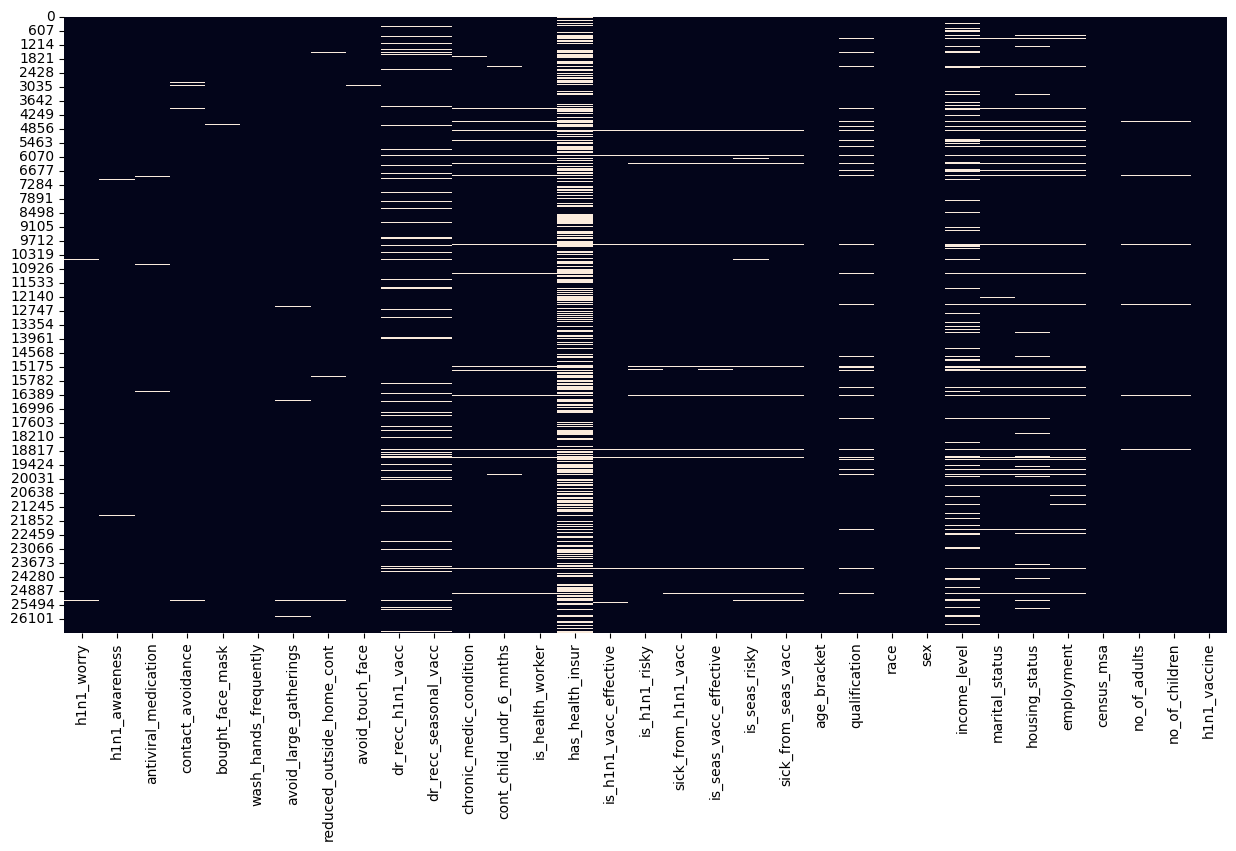

In [ ]:
# plot heatmap to check null values
# cbar=
sns.heatmap(df.isnull(),cbar=False)
plt.show()

In [ ]:
df.drop(['has_health_insur','income_level','dr_recc_seasonal_vacc','dr_recc_h1n1_vacc'],axis=1,inplace=True)

In [ ]:
df.shape

(26707, 29)

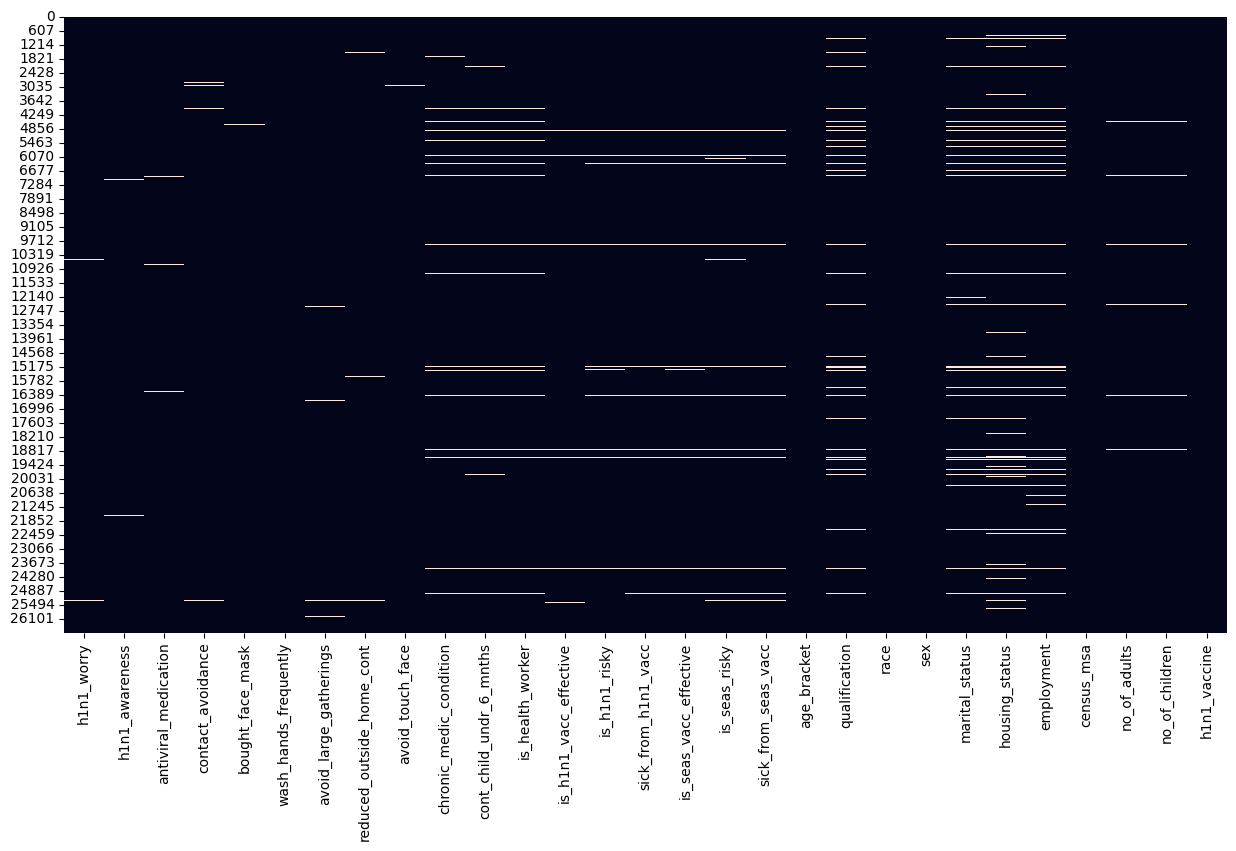

In [ ]:
sns.heatmap(df.isnull(),cbar=False)
plt.show()

In [ ]:
df.dropna(axis=0,inplace=True)

In [ ]:
df.shape

(23426, 29)

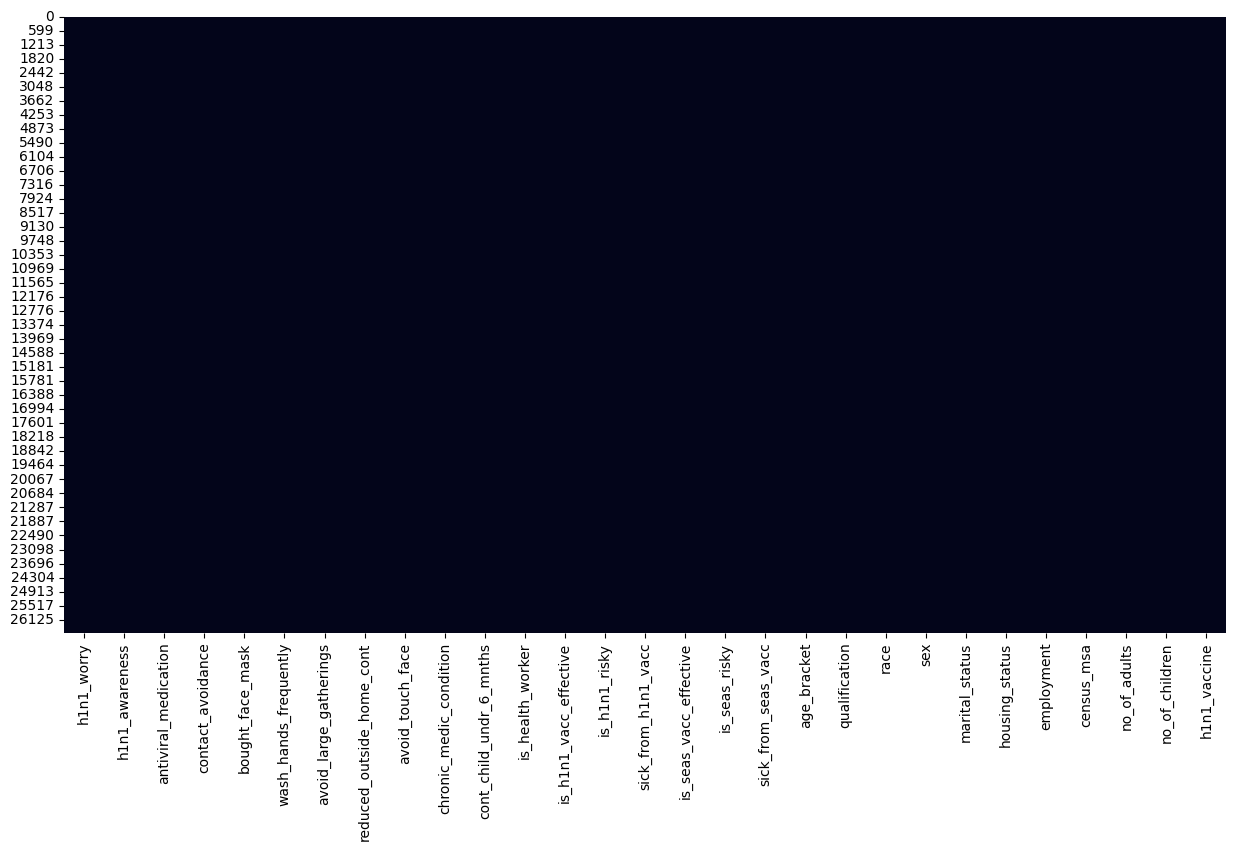

In [ ]:
sns.heatmap(df.isnull(),cbar=False)
plt.show()

In [ ]:
df.isnull().sum()

,0
h1n1_worry,0
h1n1_awareness,0
antiviral_medication,0
contact_avoidance,0
bought_face_mask,0
wash_hands_frequently,0
avoid_large_gatherings,0
reduced_outside_home_cont,0
avoid_touch_face,0
chronic_medic_condition,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23426 entries, 0 to 26706
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   h1n1_worry                 23426 non-null  object
 1   h1n1_awareness             23426 non-null  object
 2   antiviral_medication       23426 non-null  object
 3   contact_avoidance          23426 non-null  object
 4   bought_face_mask           23426 non-null  object
 5   wash_hands_frequently      23426 non-null  object
 6   avoid_large_gatherings     23426 non-null  object
 7   reduced_outside_home_cont  23426 non-null  object
 8   avoid_touch_face           23426 non-null  object
 9   chronic_medic_condition    23426 non-null  object
 10  cont_child_undr_6_mnths    23426 non-null  object
 11  is_health_worker           23426 non-null  object
 12  is_h1n1_vacc_effective     23426 non-null  object
 13  is_h1n1_risky              23426 non-null  object
 14  sick_from_h

# Prepare the data

In [ ]:
df.dtypes

,0
h1n1_worry,object
h1n1_awareness,object
antiviral_medication,object
contact_avoidance,object
bought_face_mask,object
wash_hands_frequently,object
avoid_large_gatherings,object
reduced_outside_home_cont,object
avoid_touch_face,object
chronic_medic_condition,object


In [ ]:
#  create a list of all categorical variables
# initiate an empty list to store the categorical variables
categorical=[]

# use for loop to check the data type of each variable
for column in df:

  # use if statement with condition to check the categorical vtype
  if is_string_dtype(df[column]):

    # append the variables with categoric data type in the list categorical
    categorical.append(column)

In [ ]:
categorical

['age_bracket',
 'qualification',
 'race',
 'sex',
 'marital_status',
 'housing_status',
 'employment',
 'census_msa']

In [ ]:
# dataframe with categorical features
# 'categorical' contains a list of cat var

df_cat=df[categorical]

# dataframe with numerical features
# use 'drop' to drop the cat var
# axis=1 drops the corresponding columns
df_num=df['h1n1_vaccine']
df_catt=df.drop(categorical,axis=1)


In [ ]:
df_num.head(2)

,h1n1_vaccine
0,0
1,0


In [ ]:
df_num.shape

(23426,)

In [ ]:
df_cat.head(2)

,age_bracket,qualification,race,sex,marital_status,housing_status,employment,census_msa
0,55 - 64 Years,< 12 Years,White,Female,Not Married,Own,Not in Labor Force,Non-MSA
1,35 - 44 Years,12 Years,White,Male,Not Married,Rent,Employed,"MSA, Not Principle City"


In [ ]:
df_cat.shape

(23426, 8)

In [ ]:
df.shape

(23426, 29)

# Dummy encode the cat var

In [ ]:
# label encoding is converting the labels into numeric form so as to convert them into machine readable


In [ ]:
# use 'get_dummies()' from pandas to create dummy variables
# use 'drop_first =True' to create (n-1) dummy varibables
# df_cat_dummies=pd.get_dummies(df_cat,drop_first=True)

In [ ]:
# df_cat_dummies.head()

In [ ]:
# df_cat_dummies.shape

In [ ]:
df_num_dummies=pd.get_dummies(df_num,drop_first=True)

In [ ]:
df_num_dummies.head()

,1
0,False
1,False
2,False
3,False
4,False


In [ ]:
df_num_dummies.shape

(23426, 1)

In [ ]:
# df_cat=df_features
df_cat_dummies=pd.get_dummies(df,drop_first=True)
df_cat_dummies.dropna(axis=0,inplace=True)
df_cat_dummy=df_cat_dummies.drop(['h1n1_vaccine'],axis=1,inplace=True)


In [ ]:
df_cat_dummies.head(2)

,h1n1_worry_1.0,h1n1_worry_2.0,h1n1_worry_3.0,h1n1_awareness_1.0,h1n1_awareness_2.0,antiviral_medication_1.0,contact_avoidance_1.0,bought_face_mask_1.0,wash_hands_frequently_1.0,avoid_large_gatherings_1.0,reduced_outside_home_cont_1.0,avoid_touch_face_1.0,chronic_medic_condition_1.0,cont_child_undr_6_mnths_1.0,is_health_worker_1.0,is_h1n1_vacc_effective_2.0,is_h1n1_vacc_effective_3.0,is_h1n1_vacc_effective_4.0,is_h1n1_vacc_effective_5.0,is_h1n1_risky_2.0,is_h1n1_risky_3.0,is_h1n1_risky_4.0,is_h1n1_risky_5.0,sick_from_h1n1_vacc_2.0,sick_from_h1n1_vacc_3.0,sick_from_h1n1_vacc_4.0,sick_from_h1n1_vacc_5.0,is_seas_vacc_effective_2.0,is_seas_vacc_effective_3.0,is_seas_vacc_effective_4.0,is_seas_vacc_effective_5.0,is_seas_risky_2.0,is_seas_risky_3.0,is_seas_risky_4.0,is_seas_risky_5.0,sick_from_seas_vacc_2.0,sick_from_seas_vacc_3.0,sick_from_seas_vacc_4.0,sick_from_seas_vacc_5.0,age_bracket_35 - 44 Years,age_bracket_45 - 54 Years,age_bracket_55 - 64 Years,age_bracket_65+ Years,qualification_< 12 Years,qualification_College Graduate,qualification_Some College,race_Hispanic,race_Other or Multiple,race_White,sex_Male,marital_status_Not Married,housing_status_Rent,employment_Not in Labor Force,employment_Unemployed,"census_msa_MSA, Principle City",census_msa_Non-MSA,no_of_adults_1.0,no_of_adults_2.0,no_of_adults_3.0,no_of_children_1.0,no_of_children_2.0,no_of_children_3.0
0,True,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,True,False,False,False,False,True,False,True,False,True,False,False,True,False,False,False,False,False,False
1,False,False,True,False,True,False,True,False,True,False,True,True,False,False,False,False,False,False,True,False,False,True,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,True,True,True,True,False,False,False,False,False,False,False,False,False,False


In [ ]:
df_cat_dummies.shape

(23426, 62)

In [ ]:
# df_num contains only the target var 'h1n1'
# we store in df 'y'
y=pd.DataFrame(df_num)

In [ ]:
# df_cat_dummies contain all the dummy encoded independent var
X=pd.DataFrame(df_cat_dummies)

In [ ]:
X.head(2)

,h1n1_worry_1.0,h1n1_worry_2.0,h1n1_worry_3.0,h1n1_awareness_1.0,h1n1_awareness_2.0,antiviral_medication_1.0,contact_avoidance_1.0,bought_face_mask_1.0,wash_hands_frequently_1.0,avoid_large_gatherings_1.0,reduced_outside_home_cont_1.0,avoid_touch_face_1.0,chronic_medic_condition_1.0,cont_child_undr_6_mnths_1.0,is_health_worker_1.0,is_h1n1_vacc_effective_2.0,is_h1n1_vacc_effective_3.0,is_h1n1_vacc_effective_4.0,is_h1n1_vacc_effective_5.0,is_h1n1_risky_2.0,is_h1n1_risky_3.0,is_h1n1_risky_4.0,is_h1n1_risky_5.0,sick_from_h1n1_vacc_2.0,sick_from_h1n1_vacc_3.0,sick_from_h1n1_vacc_4.0,sick_from_h1n1_vacc_5.0,is_seas_vacc_effective_2.0,is_seas_vacc_effective_3.0,is_seas_vacc_effective_4.0,is_seas_vacc_effective_5.0,is_seas_risky_2.0,is_seas_risky_3.0,is_seas_risky_4.0,is_seas_risky_5.0,sick_from_seas_vacc_2.0,sick_from_seas_vacc_3.0,sick_from_seas_vacc_4.0,sick_from_seas_vacc_5.0,age_bracket_35 - 44 Years,age_bracket_45 - 54 Years,age_bracket_55 - 64 Years,age_bracket_65+ Years,qualification_< 12 Years,qualification_College Graduate,qualification_Some College,race_Hispanic,race_Other or Multiple,race_White,sex_Male,marital_status_Not Married,housing_status_Rent,employment_Not in Labor Force,employment_Unemployed,"census_msa_MSA, Principle City",census_msa_Non-MSA,no_of_adults_1.0,no_of_adults_2.0,no_of_adults_3.0,no_of_children_1.0,no_of_children_2.0,no_of_children_3.0
0,True,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,True,False,False,False,False,True,False,True,False,True,False,False,True,False,False,False,False,False,False
1,False,False,True,False,True,False,True,False,True,False,True,True,False,False,False,False,False,False,True,False,False,True,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,True,True,True,True,False,False,False,False,False,False,False,False,False,False


In [ ]:
X.shape

(23426, 62)

In [ ]:
y.shape

(23426, 1)

# Create a generalized func to cal the metrics values for test set

In [ ]:
def get_test_report(model):
  # return the performance measures on test set
  return(classification_report(y_test,y_pred))

# Create a generalized func to cal the kappa score for test set

In [ ]:
def kappa_score(model):
  # return the kappa score on test set
  return(cohen_kappa_score(y_test,y_pred))

# The kappa statistic is a measure of how closely the instances classified by the ml
# classifier matched the data labeld as ground as ground truth,controlling for the accuracy of a random classifier
# as measured by the expected accuracy
# kappa >0.75 as excellent, 0.40-0.75 as fair to good, and <0.4 as poor


# New define a func to plot the confusion matrix

In [ ]:
def plot_confusion_matrix(model):
  # create a cf m
  # pass the actual and predicted target values to the cm
  cm =confusion_matrix(y_test,y_pred)

  #label the cm
  # pass the matrisx data
  conf_matrix=pd.Dataframe(data=cm,columns=['predicted:0', 'predicted:1'],
                           index=['Actual:0','Actual:1'])

  # plot a heatmap to visualize the cm
  # annot prints the value of each grid
  # 'fmt=d' returns the integer value of each grid
  # cmap assigns color to each grid
  # as we do not require diff colors for each grid in the heatmap
  # use ListedColormap' to ssign the specified color to the grid
  # cbar=False will not return the color bar to the right side of the heatmap
  # 'linewodths' assigns the width to the line that divides each gris
  # 'annot_kws'={size:25} assign the fontsize of the annoted text

  sns.heatmap(conf_matrix,annot=True,fmt='d',cmap=ListedColormap(['lightskyblue']),
              cbar=False,linewidths=0.1,annot_kws={'size':25})

  # set the fotnt size of x-aixs
  plt.xticks(fontsize=20)
  plt.yticks(fontsize=20)
  plt.show()

In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# import pandas as pd
# from sklearn.metrics import confusion_matrix
# from matplotlib.colors import ListedColormap

# def plot_confusion_matrix(y_test, y_pred):
#     # Create the confusion matrix
#     cm = confusion_matrix(y_test, y_pred)

#     # Label the confusion matrix using a DataFrame
#     conf_matrix = pd.DataFrame(data=cm,
#                                columns=['Predicted: 0', 'Predicted: 1'],
#                                index=['Actual: 0', 'Actual: 1'])

#     # Plot a heatmap to visualize the confusion matrix
#     sns.heatmap(conf_matrix,
#                 annot=True,
#                 fmt='d',
#                 cmap=ListedColormap(['lightskyblue']),
#                 cbar=False,
#                 linewidths=0.1,
#                 annot_kws={'size': 20})

#     # Set font sizes for x-axis and y-axis ticks
#     plt.xticks(fontsize=15)
#     plt.yticks(fontsize=15)
#     plt.title('Confusion Matrix', fontsize=18)
#     plt.show()


# define func for plot ROC curve

In [ ]:
def plot_roc(model):
  #
  # the roc_curve rethrn the values for false positive rate, true posive reate thresold pass ht eactual target vakues and predicted
  # prob to the func

  fpr,tpr,_=roc_curve(y_test,y_pred_prob)
  plt.plot(fpr,tpr)

  # set limits for x and t axes
  plt.xlim([0.0,1.0])
  plt.ylim([0.0,1.0])

  # add plot and axes labels
  plt.plot([0,1],[0,1],'r--')


  plt.title('ROC Curve for h1n1_vaccine Classfier',fontsize=15)
  plt.xlabel('False positve rate (1-specificity)',fontsize=15)
  plt.ylabel('True positve rate (sensitivity)',fontsize=15)

  # add the AUc score to the plot
  # 'x' and 'y' gives position of the text
  # use round() to roundoff the AUC score upto 4 digit
  plt.text(x=0.02,y=0.09,s=('AUC Score',round(roc_auc_score(y_test,y_pred_prob),4)))

  plt.grid(True)

# New create a generalized func to create a dataframe containing the scores for models

In [ ]:
# # create an empty df to store the scoes for various classification algo
# score_card=pd.DataFrame(columns=['Model','AUC Score','Precision Score','Recall Score','Accuracy Score','Kappa Score','F1 Score'])

# # append the result table for all performance scores
# # performance measxures considered for comparision are 'auc'Precision Score','Recall Score''Accuracy ','Kappa Score','F1 Score
# # compile the required info in a user def func
# def update_score_card(model_name):

#   global score_card

#   # append the results to the df score card
#   # ignore_index =True do not consider the index labels
#   score_card=score_card.append({'Model':model_name,
#                                 'AUC Score':roc_auc_score(y_test,y_pred_prob),
#                                 'Precision Score':metrics.precision_score(y_test,y_pred),
#                                 'Recall Score':metrics.recall_score(y_test,y_pred),
#                                 'Accuracy Score':metrics.accuracy_score(y_test,y_pred),
#                                 'Kappa Score':cohen_kappa_score(y_test,y_pred),
#                                 'F1 Score':metrics.f1_score(y_test,y_pred)},
#                                 ignore_index=True)
#   return(score_card)


In [ ]:
import pandas as pd
from sklearn import metrics
from sklearn.metrics import roc_auc_score, cohen_kappa_score

# Create an empty DataFrame to store the scores for various classification algorithms
score_card = pd.DataFrame(columns=[
    'Model', 'AUC Score', 'Precision Score', 'Recall Score',
    'Accuracy Score', 'Kappa Score', 'F1 Score'
])

# Define a function to update the score_card
def update_score_card(model_name, y_test, y_pred, y_pred_prob):
    global score_card

    # Create a dictionary of performance scores
    scores = {
        'Model': model_name,
        'AUC Score': roc_auc_score(y_test, y_pred_prob),
        'Precision Score': metrics.precision_score(y_test, y_pred),
        'Recall Score': metrics.recall_score(y_test, y_pred),
        'Accuracy Score': metrics.accuracy_score(y_test, y_pred),
        'Kappa Score': cohen_kappa_score(y_test, y_pred),
        'F1 Score': metrics.f1_score(y_test, y_pred)
    }

    # Append the scores to the score_card DataFrame using pd.concat (append is deprecated)
    score_card = pd.concat([score_card, pd.DataFrame([scores])], ignore_index=True)

    return score_card


# **5. Logistic Regression**




#  Logistic Regression (using MLE)

**1.Introduce the Incept term**

In [ ]:
# add the intercept colum using 'add_constant()'
X=sm.add_constant(X)

X.head()


,const,h1n1_worry_1.0,h1n1_worry_2.0,h1n1_worry_3.0,h1n1_awareness_1.0,h1n1_awareness_2.0,antiviral_medication_1.0,contact_avoidance_1.0,bought_face_mask_1.0,wash_hands_frequently_1.0,avoid_large_gatherings_1.0,reduced_outside_home_cont_1.0,avoid_touch_face_1.0,chronic_medic_condition_1.0,cont_child_undr_6_mnths_1.0,is_health_worker_1.0,is_h1n1_vacc_effective_2.0,is_h1n1_vacc_effective_3.0,is_h1n1_vacc_effective_4.0,is_h1n1_vacc_effective_5.0,is_h1n1_risky_2.0,is_h1n1_risky_3.0,is_h1n1_risky_4.0,is_h1n1_risky_5.0,sick_from_h1n1_vacc_2.0,sick_from_h1n1_vacc_3.0,sick_from_h1n1_vacc_4.0,sick_from_h1n1_vacc_5.0,is_seas_vacc_effective_2.0,is_seas_vacc_effective_3.0,is_seas_vacc_effective_4.0,is_seas_vacc_effective_5.0,is_seas_risky_2.0,is_seas_risky_3.0,is_seas_risky_4.0,is_seas_risky_5.0,sick_from_seas_vacc_2.0,sick_from_seas_vacc_3.0,sick_from_seas_vacc_4.0,sick_from_seas_vacc_5.0,age_bracket_35 - 44 Years,age_bracket_45 - 54 Years,age_bracket_55 - 64 Years,age_bracket_65+ Years,qualification_< 12 Years,qualification_College Graduate,qualification_Some College,race_Hispanic,race_Other or Multiple,race_White,sex_Male,marital_status_Not Married,housing_status_Rent,employment_Not in Labor Force,employment_Unemployed,"census_msa_MSA, Principle City",census_msa_Non-MSA,no_of_adults_1.0,no_of_adults_2.0,no_of_adults_3.0,no_of_children_1.0,no_of_children_2.0,no_of_children_3.0
0,1.0,True,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,True,False,False,False,False,True,False,True,False,True,False,False,True,False,False,False,False,False,False
1,1.0,False,False,True,False,True,False,True,False,True,False,True,True,False,False,False,False,False,False,True,False,False,True,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,True,True,True,True,False,False,False,False,False,False,False,False,False,False
2,1.0,True,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True,True,True,False,False,False,False,False,False,True,False,False,False,False
3,1.0,True,False,False,True,False,False,True,False,True,True,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,True,True,True,False,True,False,False,False,False,False,False,False
4,1.0,False,True,False,True,False,False,True,False,True,True,False,True,False,False,False,False,True,False,False,False,True,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False


**2. Split the dataset into train and test sets**

In [ ]:
# split data into train subset and test subset
# set 'random_state' to generate the dame dataset each time you run the code
# 'test_size' returns the proportion of data to be included int the test set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=10)

# check the dimensions of the train and test subset using 'shape'
# print dimension of train set
print('X_train',X_train.shape)
print('y_train',y_train.shape)

# print dimension of test set
print('X_test',X_test.shape)
print('y_test',y_test.shape)



X_train (16398, 63)
y_train (16398, 1)
X_test (7028, 63)
y_test (7028, 1)


# 3. Built a Logistic regression model using statsmodel Logit().

In [ ]:
# Check the data types of columns in X_train
print(X_train.dtypes[X_train.dtypes == 'object'])

# Convert object type columns to float
for col in X_train.columns:
    if X_train[col].dtype == 'object':
        X_train[col] = X_train[col].astype(float)
    elif X_train[col].dtype == 'bool': # Convert boolean columns to integer
        X_train[col] = X_train[col].astype(int)


# build the model on train data(X_train and y_train)
# use fit() to fit the logistic regressoin
log_reg_model=sm.Logit(y_train,X_train).fit()

print(log_reg_model.summary())

Series([], dtype: object)
Optimization terminated successfully.
         Current function value: 0.414325
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:           h1n1_vaccine   No. Observations:                16398
Model:                          Logit   Df Residuals:                    16335
Method:                           MLE   Df Model:                           62
Date:                Fri, 30 May 2025   Pseudo R-squ.:                  0.1990
Time:                        12:25:44   Log-Likelihood:                -6794.1
converged:                       True   LL-Null:                       -8482.4
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -4.4648 

# 4. Do predictions on the test set

In [ ]:
# Convert boolean columns in X_test to integer
for col in X_test.columns:
    if X_test[col].dtype == 'bool':
        X_test[col] = X_test[col].astype(int)

# y_pred_prob be the predicted values of y
y_pred_prob=log_reg_model.predict(X_test)

y_pred_prob.head()

,0
9480,0.193582
25478,0.663039
16789,0.091390
8036,0.121057
7121,0.156698


In [ ]:
# convert probabilities to 0 and 1 using if else
y_pred=['0' if x<0.5 else '1' for x in y_pred_prob]


In [ ]:
y_pred=np.array(y_pred, dtype=np.float32)
y_pred[0:5]

array([0., 1., 0., 0., 0.], dtype=float32)

In [ ]:
y_pred

array([0., 1., 0., ..., 1., 0., 0.], dtype=float32)

**5. CAlculate the performance measures**

**Build a confusion matrix**

In [ ]:
# call the func to plot the confusion matrix
# pass the logistic regression model to the func
plot_confusion_matrix(log_reg_model)

AttributeError: module 'pandas' has no attribute 'Dataframe'

In [ ]:
# compute the performance measures on test data
# call the func 'get_test_report'
# pass the logistic regression model to the func
test_report=get_test_report(log_reg_model)
print(test_report)

              precision    recall  f1-score   support

           0       0.83      0.95      0.89      5476
           1       0.65      0.33      0.44      1552

    accuracy                           0.81      7028
   macro avg       0.74      0.64      0.66      7028
weighted avg       0.79      0.81      0.79      7028



In [ ]:
# compute the kappa score on test data
# call the func 'kappa_score'
# pass the logistic regression model to the func
kappa_value=kappa_score(log_reg_model)
print(kappa_value)

0.3426774787926872


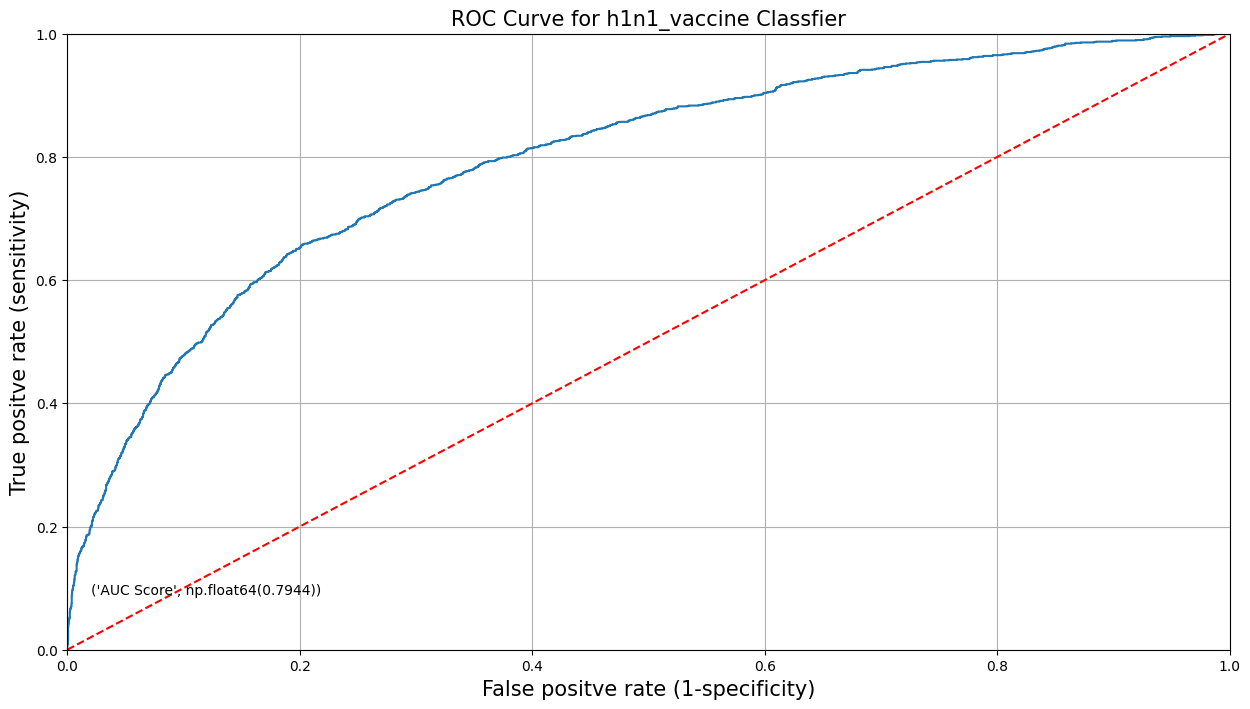

In [ ]:
# 'plot_roc' to plot
plot_roc(log_reg_model)

***6. Tabulate the results***

In [ ]:
# use the func 'update_Score_card' to store the performance measures
# update_score_card(model_name= 'Logistic Regression')
update_score_card()

TypeError: update_score_card() missing 4 required positional arguments: 'model_name', 'y_test', 'y_pred', and 'y_pred_prob'

# 5.2 Logistic Regression (using SGD)

In [ ]:
SGD=SGDClassifier(loss='log_loss',random_state=10)
logreg_with_SGD=SGD.fit(X_train,y_train)

**Do predictions on the test set**

In [ ]:
y_pred_prob=logreg_with_SGD.predict_proba(X_test)[:,1]


In [ ]:
y_pred=logreg_with_SGD.predict(X_test)
y_pred

array([0, 1, 0, ..., 1, 0, 0])

In [ ]:
plot_confusion_matrix(logreg_with_SGD)

AttributeError: module 'pandas' has no attribute 'Dataframe'

In [ ]:
test_report=get_test_report(logreg_with_SGD)
print(test_report)

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      5476
           1       0.66      0.28      0.40      1552

    accuracy                           0.81      7028
   macro avg       0.74      0.62      0.64      7028
weighted avg       0.79      0.81      0.78      7028



In [ ]:
kappa_value=kappa_score(logreg_with_SGD)
print(kappa_value)

0.30475321107275866


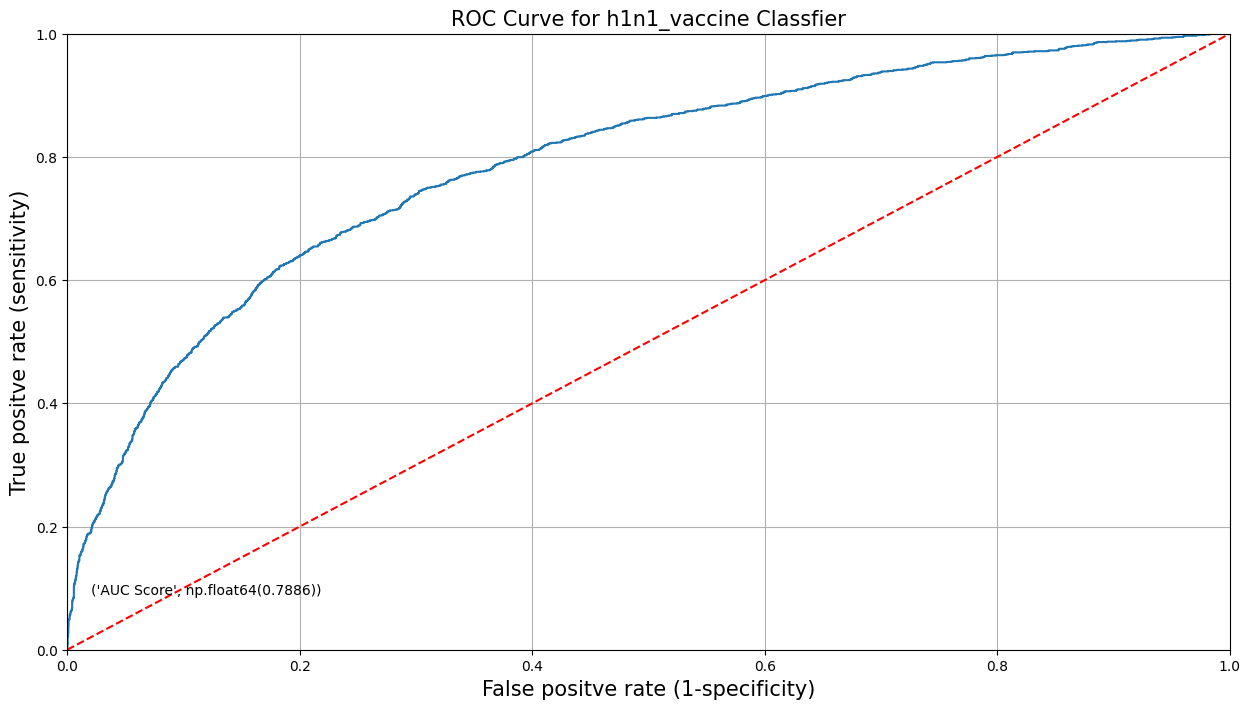

In [ ]:
plot_roc(logreg_with_SGD)

In [ ]:
update_score_card(model_name= 'Logistic Regression with SGD')

TypeError: update_score_card() missing 3 required positional arguments: 'y_test', 'y_pred', and 'y_pred_prob'

In [ ]:
score_card

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,F1 Score


In [ ]:
score_card.plot()

plt.title(label='Comparison of the models',fontsize=15)

plt.xticks([0,1],list(score_card),rotation='vertical')

plt.xlabel('Models',fontsize=15)
plt.ylabel('Score',fontsize=15)

plt.show()

TypeError: no numeric data to plot